## Lab 9 - Dense Neural Network
## Name: Samiksha Rajpal
## Student Id: 8908982

##### Questions:
1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points).
2. Train a dense neural network using Keras, try out at least three hyperparameters configurations (2 points)
3. Evaluate its accuracy for each of the configurations. Choose the best configuration, and: Report its accuracy, confusion metric, and specific examples of incorrect classification, and drew some conclusions from this exploration (2 points)

##### Solution:

In [47]:
	
#  importing the datset
from tensorflow.keras.datasets import fashion_mnist

# loading the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [48]:
# Exploring the dataset
print("Training data shape:", train_images.shape)
print("Number of training samples:", len(train_images))
print("Number of testing samples:", len(test_images))
print("Image shape:", train_images[0].shape)
print("Labels:", set(train_labels))

Training data shape: (60000, 28, 28)
Number of training samples: 60000
Number of testing samples: 10000
Image shape: (28, 28)
Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [49]:
# further exploration

print(f'Image Dtype: {type(train_images.dtype)}')
print(f'Image Element Dtype: {type(train_images[0,0,0])}')
print(f'Label element Dtype: {type(train_labels[0])}')
print('shapes')
print(f'Image shape: {train_images.shape}')
print(f'Label shape: {train_labels.shape}')
print('test data')
print(f'Image shape: {test_images.shape}')
print(f'Label shape: {test_labels.shape}')
print('image data range')
print(f'Image min: {train_images.min()}')
print(f'Image max: {train_images.max()}')

Image Dtype: <class 'numpy.dtype[uint8]'>
Image Element Dtype: <class 'numpy.uint8'>
Label element Dtype: <class 'numpy.uint8'>
shapes
Image shape: (60000, 28, 28)
Label shape: (60000,)
test data
Image shape: (10000, 28, 28)
Label shape: (10000,)
image data range
Image min: 0
Image max: 255


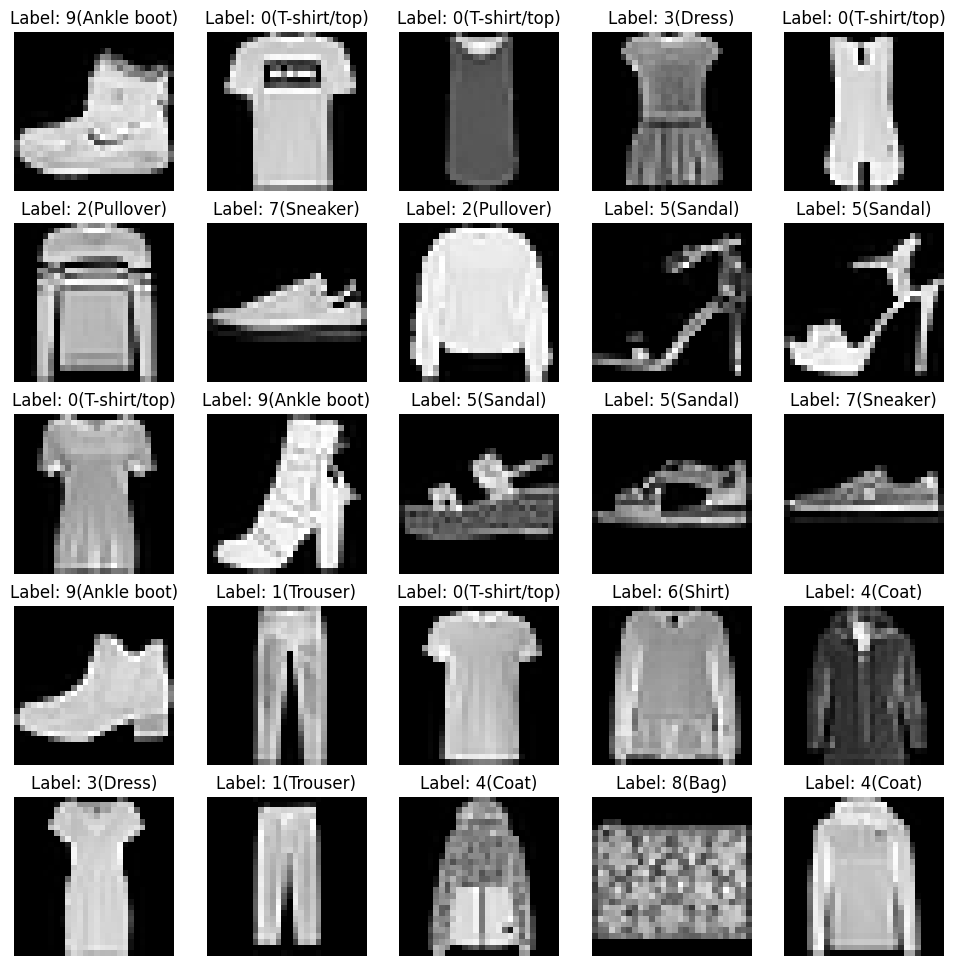

In [50]:
# Displaying some sample images

import matplotlib.pyplot as plt

class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}({class_names[train_labels[i]]})")
    plt.axis('off')
plt.show()


In [51]:
from tensorflow.keras.utils import to_categorical
# Preprocessing the data
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [52]:

# Function to create and compile a dense neural network
from tensorflow.keras import models, layers
def create_model(hidden_layers, units, activation, optimizer):
    model = models.Sequential()
    model.add(layers.Dense(units, activation=activation, input_shape=(28 * 28,)))
    
    for _ in range(hidden_layers - 1):
        model.add(layers.Dense(units, activation=activation))
    
    model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 units for 10 classes
    
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model



In [53]:
# Define hyperparameter configurations
configurations = [
    {'hidden_layers': 2, 'units': 64, 'activation': 'relu', 'optimizer': 'adam'},
    {'hidden_layers': 3, 'units': 128, 'activation': 'sigmoid', 'optimizer': 'rmsprop'},
    {'hidden_layers': 1, 'units': 32, 'activation': 'tanh', 'optimizer': 'sgd'}
]




In [54]:
# Train models with different hyperparameter configurations
for i, config in enumerate(configurations):
    model = create_model(**config)
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2, verbose=2)
    
  

Epoch 1/10
375/375 - 4s - loss: 0.6377 - accuracy: 0.7782 - val_loss: 0.4957 - val_accuracy: 0.8322 - 4s/epoch - 10ms/step
Epoch 2/10
375/375 - 3s - loss: 0.4863 - accuracy: 0.8314 - val_loss: 0.5032 - val_accuracy: 0.8277 - 3s/epoch - 8ms/step
Epoch 3/10
375/375 - 3s - loss: 0.4705 - accuracy: 0.8383 - val_loss: 0.5560 - val_accuracy: 0.8082 - 3s/epoch - 8ms/step
Epoch 4/10
375/375 - 3s - loss: 0.5014 - accuracy: 0.8310 - val_loss: 0.4982 - val_accuracy: 0.8342 - 3s/epoch - 8ms/step
Epoch 5/10
375/375 - 3s - loss: 0.5266 - accuracy: 0.8252 - val_loss: 0.5262 - val_accuracy: 0.8287 - 3s/epoch - 8ms/step
Epoch 6/10
375/375 - 3s - loss: 0.5716 - accuracy: 0.8199 - val_loss: 0.9410 - val_accuracy: 0.7393 - 3s/epoch - 8ms/step
Epoch 7/10
375/375 - 3s - loss: 0.6685 - accuracy: 0.8072 - val_loss: 0.6736 - val_accuracy: 0.8286 - 3s/epoch - 8ms/step
Epoch 8/10
375/375 - 3s - loss: 0.6855 - accuracy: 0.8068 - val_loss: 0.7911 - val_accuracy: 0.7896 - 3s/epoch - 8ms/step
Epoch 9/10
375/375 - 3s

In [58]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Function to plot a colored confusion matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function to evaluate the model and print results
def evaluate_model(model, test_images, test_labels):
    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f"\nTest Accuracy: {test_acc:.4f}\n")

    # Predictions on the test set
    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(test_labels, axis=1)

    # Confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    plot_confusion_matrix(conf_matrix)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels))


    # Identify specific examples of incorrect classification
    incorrect_indices = np.where(predicted_labels != true_labels)[0]
    print("\nExamples of Incorrect Classification:")
    plt.figure(figsize=(15, 15))
    for i, idx in enumerate(incorrect_indices[:25]):
        plt.subplot(5, 5, i + 1)
        plt.imshow(test_images[idx].reshape((28, 28)), cmap='gray')
        plt.title(f"True: {true_labels[idx]}, Predicted: {predicted_labels[idx]}")
        plt.axis('off')
    plt.show()


Epoch 1/10
375/375 - 3s - loss: 0.6464 - accuracy: 0.7797 - val_loss: 0.4989 - val_accuracy: 0.8234 - 3s/epoch - 9ms/step
Epoch 2/10
375/375 - 3s - loss: 0.4833 - accuracy: 0.8324 - val_loss: 0.4570 - val_accuracy: 0.8412 - 3s/epoch - 9ms/step
Epoch 3/10
375/375 - 3s - loss: 0.4630 - accuracy: 0.8399 - val_loss: 0.4871 - val_accuracy: 0.8319 - 3s/epoch - 8ms/step
Epoch 4/10
375/375 - 3s - loss: 0.4729 - accuracy: 0.8364 - val_loss: 0.5122 - val_accuracy: 0.8313 - 3s/epoch - 7ms/step
Epoch 5/10
375/375 - 3s - loss: 0.5171 - accuracy: 0.8247 - val_loss: 0.5349 - val_accuracy: 0.8109 - 3s/epoch - 7ms/step
Epoch 6/10
375/375 - 3s - loss: 0.5301 - accuracy: 0.8254 - val_loss: 0.5597 - val_accuracy: 0.8179 - 3s/epoch - 7ms/step
Epoch 7/10
375/375 - 3s - loss: 0.5888 - accuracy: 0.8172 - val_loss: 0.5709 - val_accuracy: 0.8275 - 3s/epoch - 7ms/step
Epoch 8/10
375/375 - 3s - loss: 0.5992 - accuracy: 0.8170 - val_loss: 0.6868 - val_accuracy: 0.8033 - 3s/epoch - 7ms/step
Epoch 9/10
375/375 - 3s 

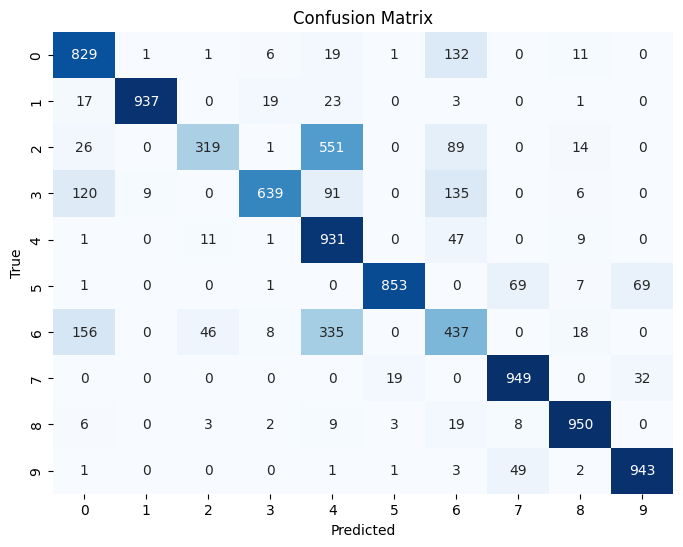


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      1000
           1       0.99      0.94      0.96      1000
           2       0.84      0.32      0.46      1000
           3       0.94      0.64      0.76      1000
           4       0.47      0.93      0.63      1000
           5       0.97      0.85      0.91      1000
           6       0.51      0.44      0.47      1000
           7       0.88      0.95      0.91      1000
           8       0.93      0.95      0.94      1000
           9       0.90      0.94      0.92      1000

    accuracy                           0.78     10000
   macro avg       0.82      0.78      0.77     10000
weighted avg       0.82      0.78      0.77     10000


Examples of Incorrect Classification:


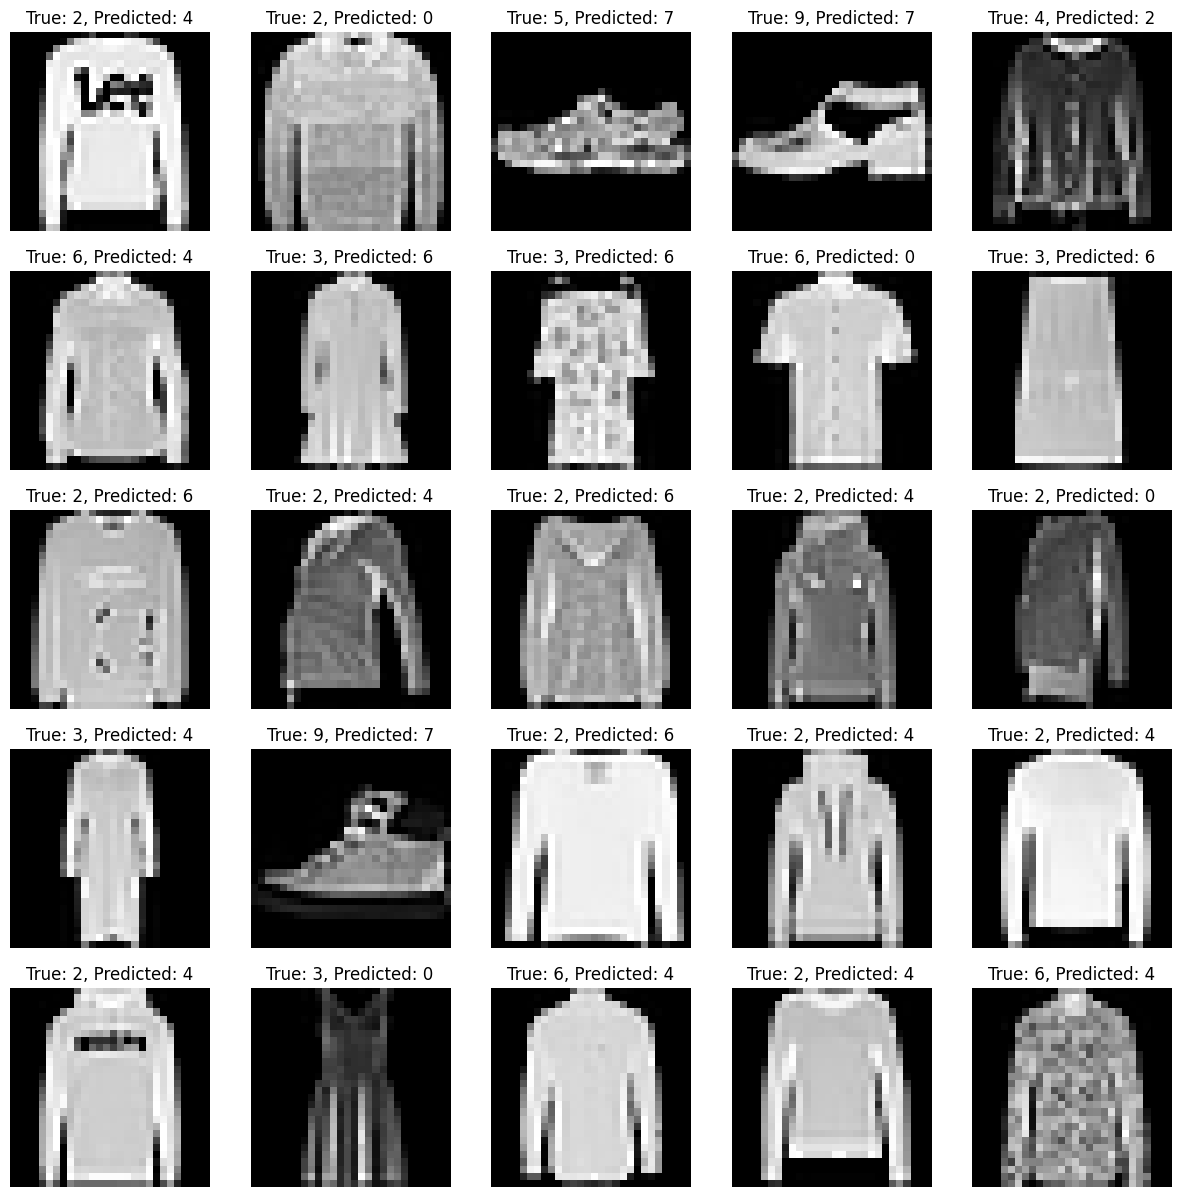

Epoch 1/10
375/375 - 4s - loss: 0.9892 - accuracy: 0.6385 - val_loss: 0.5769 - val_accuracy: 0.7771 - 4s/epoch - 12ms/step
Epoch 2/10
375/375 - 4s - loss: 0.5194 - accuracy: 0.8066 - val_loss: 0.4705 - val_accuracy: 0.8267 - 4s/epoch - 10ms/step
Epoch 3/10
375/375 - 4s - loss: 0.4424 - accuracy: 0.8402 - val_loss: 0.4138 - val_accuracy: 0.8487 - 4s/epoch - 9ms/step
Epoch 4/10
375/375 - 4s - loss: 0.4066 - accuracy: 0.8531 - val_loss: 0.4142 - val_accuracy: 0.8488 - 4s/epoch - 10ms/step
Epoch 5/10
375/375 - 4s - loss: 0.3828 - accuracy: 0.8619 - val_loss: 0.4322 - val_accuracy: 0.8365 - 4s/epoch - 10ms/step
Epoch 6/10
375/375 - 4s - loss: 0.3652 - accuracy: 0.8670 - val_loss: 0.3745 - val_accuracy: 0.8630 - 4s/epoch - 10ms/step
Epoch 7/10
375/375 - 4s - loss: 0.3497 - accuracy: 0.8719 - val_loss: 0.3584 - val_accuracy: 0.8724 - 4s/epoch - 9ms/step
Epoch 8/10
375/375 - 4s - loss: 0.3384 - accuracy: 0.8770 - val_loss: 0.3449 - val_accuracy: 0.8735 - 4s/epoch - 10ms/step
Epoch 9/10
375/375

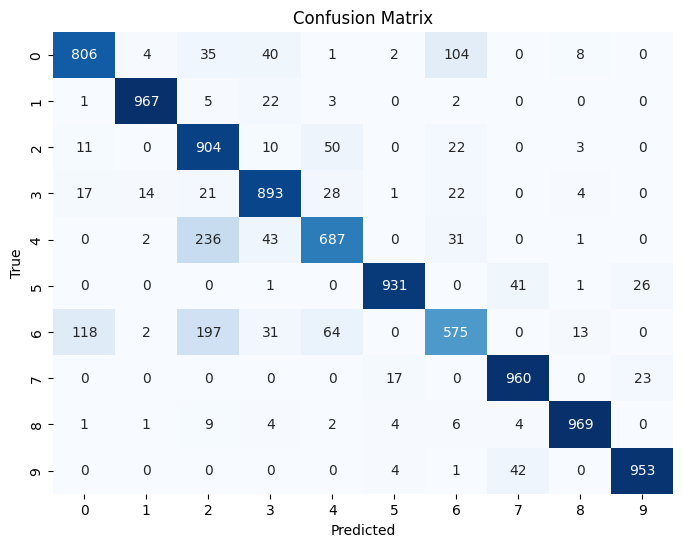


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1000
           1       0.98      0.97      0.97      1000
           2       0.64      0.90      0.75      1000
           3       0.86      0.89      0.87      1000
           4       0.82      0.69      0.75      1000
           5       0.97      0.93      0.95      1000
           6       0.75      0.57      0.65      1000
           7       0.92      0.96      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000


Examples of Incorrect Classification:


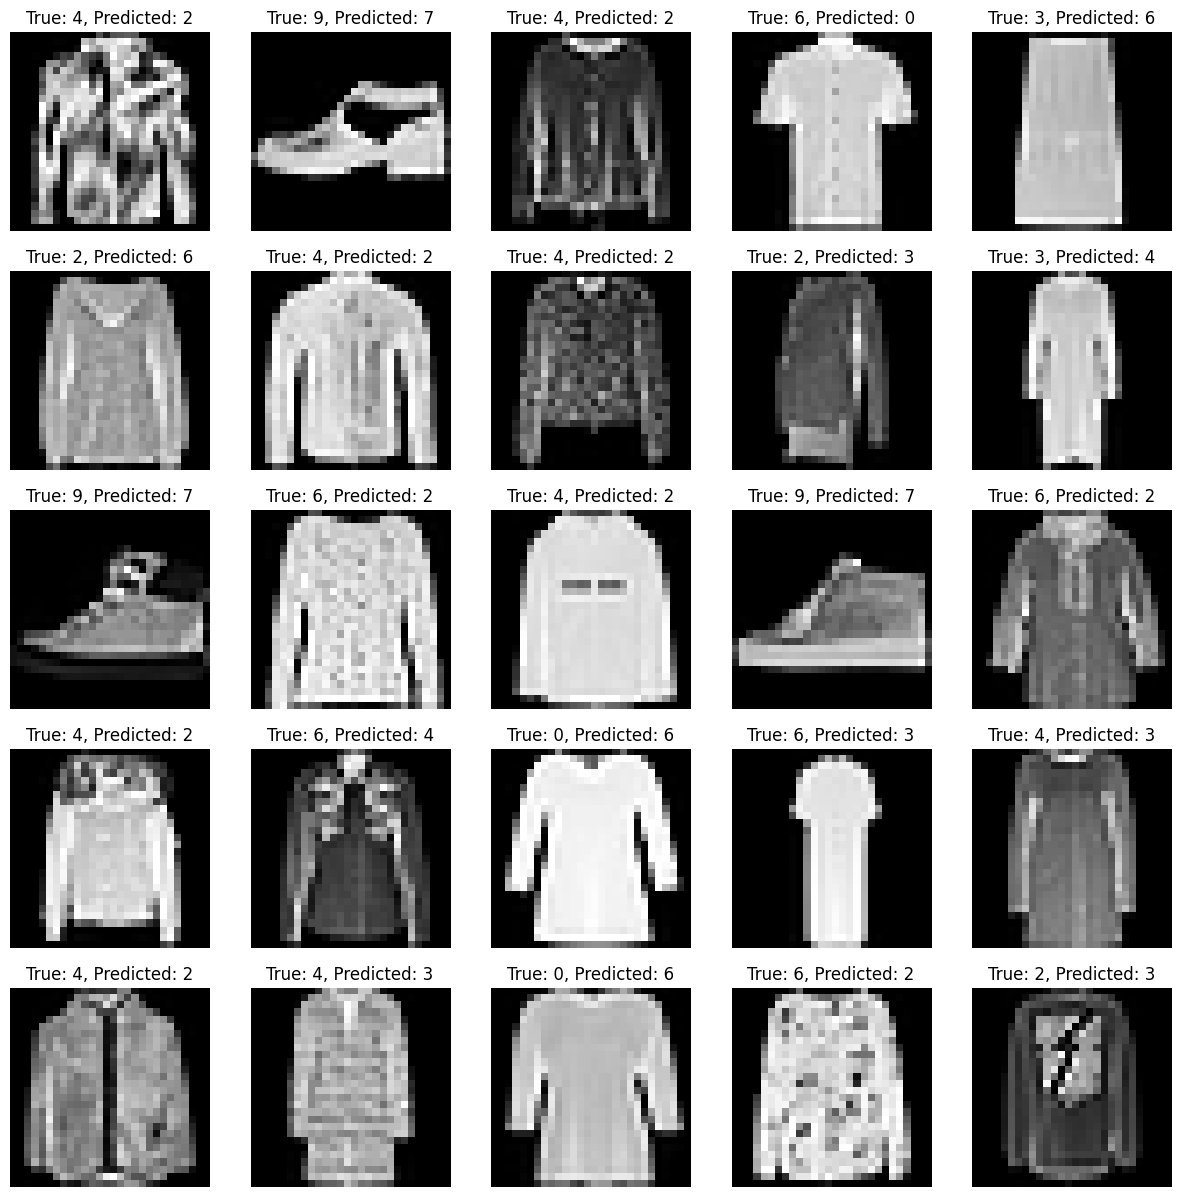

Epoch 1/10
375/375 - 3s - loss: 1.2794 - accuracy: 0.6209 - val_loss: 0.9304 - val_accuracy: 0.7041 - 3s/epoch - 9ms/step
Epoch 2/10
375/375 - 3s - loss: 0.8392 - accuracy: 0.7317 - val_loss: 0.7645 - val_accuracy: 0.7557 - 3s/epoch - 7ms/step
Epoch 3/10
375/375 - 3s - loss: 0.7229 - accuracy: 0.7679 - val_loss: 0.6833 - val_accuracy: 0.7767 - 3s/epoch - 7ms/step
Epoch 4/10
375/375 - 3s - loss: 0.6574 - accuracy: 0.7887 - val_loss: 0.6311 - val_accuracy: 0.7923 - 3s/epoch - 7ms/step
Epoch 5/10
375/375 - 3s - loss: 0.6126 - accuracy: 0.8030 - val_loss: 0.5951 - val_accuracy: 0.8019 - 3s/epoch - 7ms/step
Epoch 6/10
375/375 - 3s - loss: 0.5796 - accuracy: 0.8114 - val_loss: 0.5688 - val_accuracy: 0.8092 - 3s/epoch - 7ms/step
Epoch 7/10
375/375 - 3s - loss: 0.5544 - accuracy: 0.8184 - val_loss: 0.5463 - val_accuracy: 0.8162 - 3s/epoch - 7ms/step
Epoch 8/10
375/375 - 3s - loss: 0.5342 - accuracy: 0.8235 - val_loss: 0.5311 - val_accuracy: 0.8188 - 3s/epoch - 7ms/step
Epoch 9/10
375/375 - 3s 

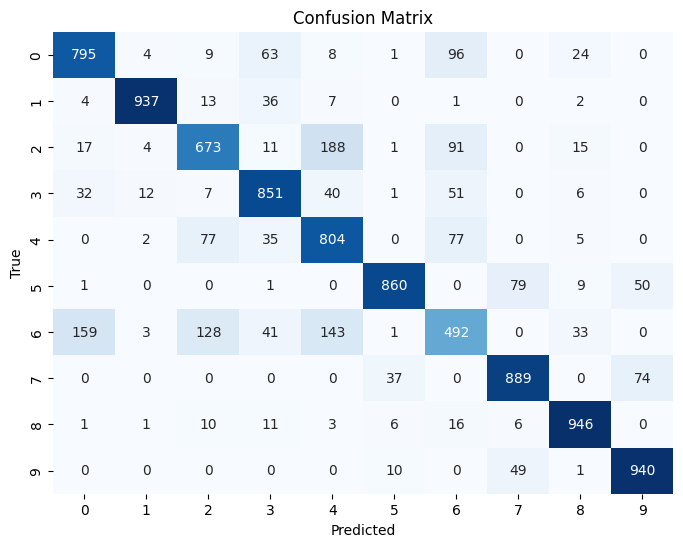


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1000
           1       0.97      0.94      0.95      1000
           2       0.73      0.67      0.70      1000
           3       0.81      0.85      0.83      1000
           4       0.67      0.80      0.73      1000
           5       0.94      0.86      0.90      1000
           6       0.60      0.49      0.54      1000
           7       0.87      0.89      0.88      1000
           8       0.91      0.95      0.93      1000
           9       0.88      0.94      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000


Examples of Incorrect Classification:


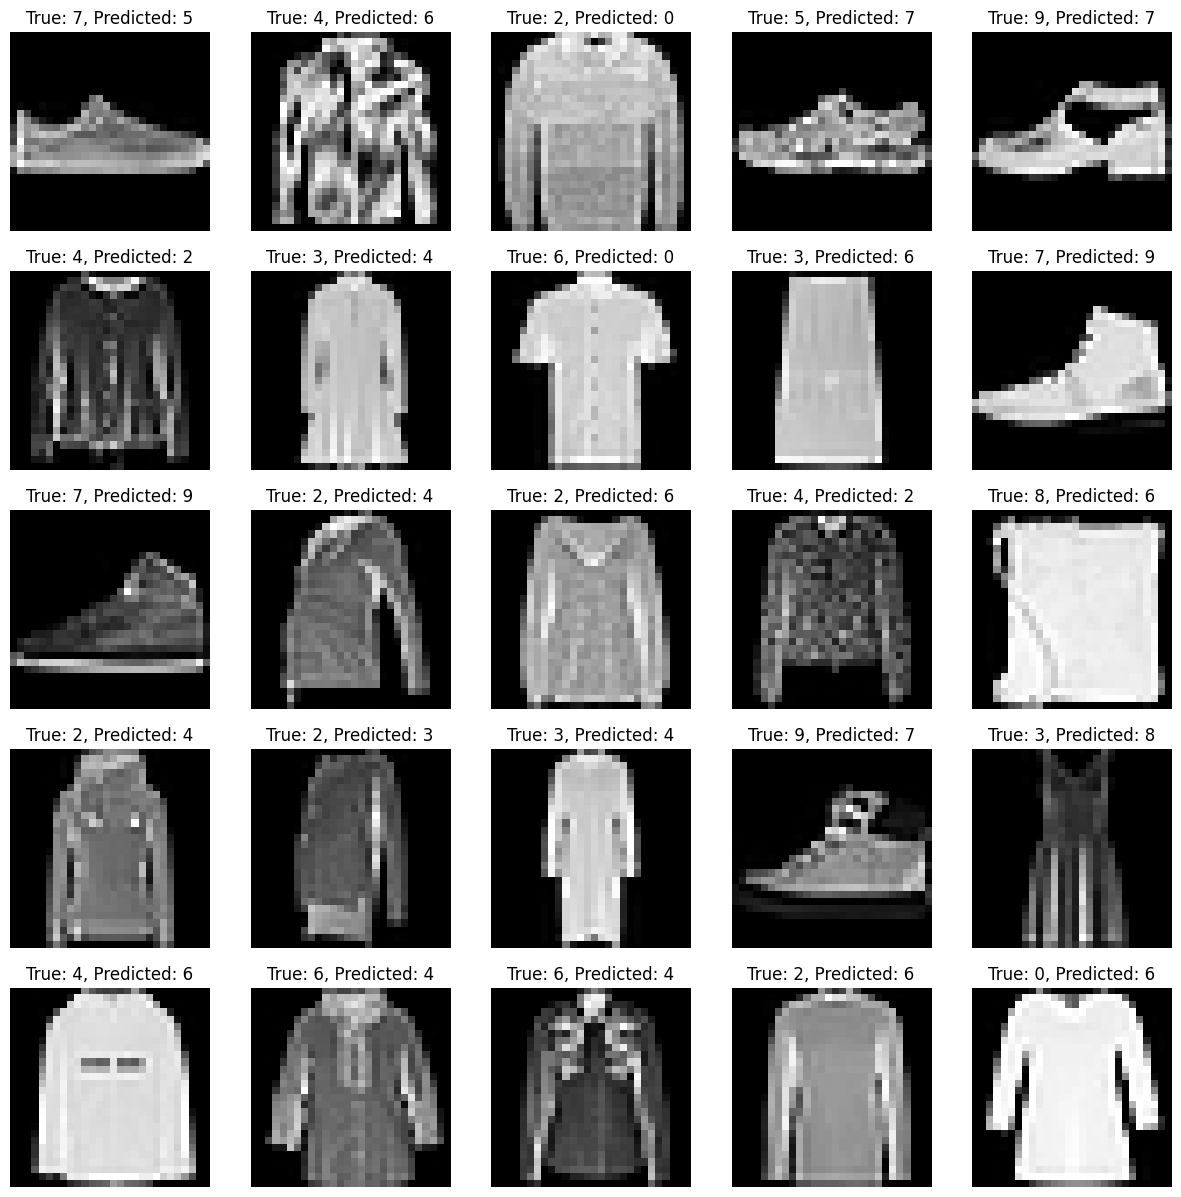


Best Model:
313/313 - 2s - loss: 0.3866 - accuracy: 0.8645 - 2s/epoch - 6ms/step

Test Accuracy: 0.8645

313/313 [==============================] - 0s 1ms/step


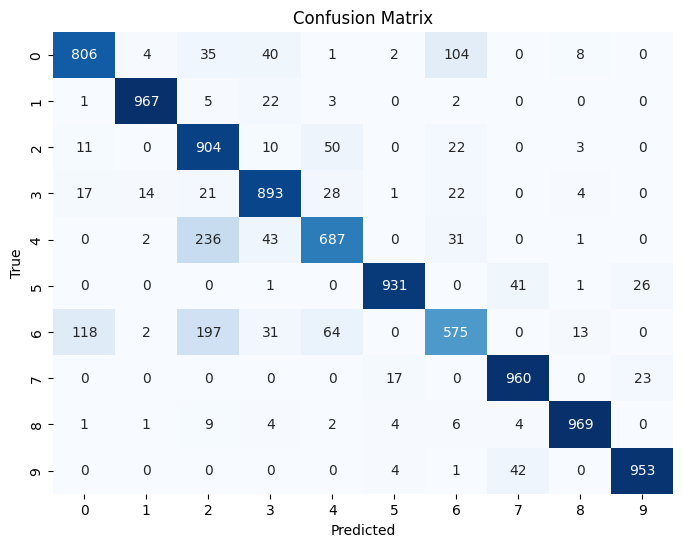


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1000
           1       0.98      0.97      0.97      1000
           2       0.64      0.90      0.75      1000
           3       0.86      0.89      0.87      1000
           4       0.82      0.69      0.75      1000
           5       0.97      0.93      0.95      1000
           6       0.75      0.57      0.65      1000
           7       0.92      0.96      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000


Examples of Incorrect Classification:


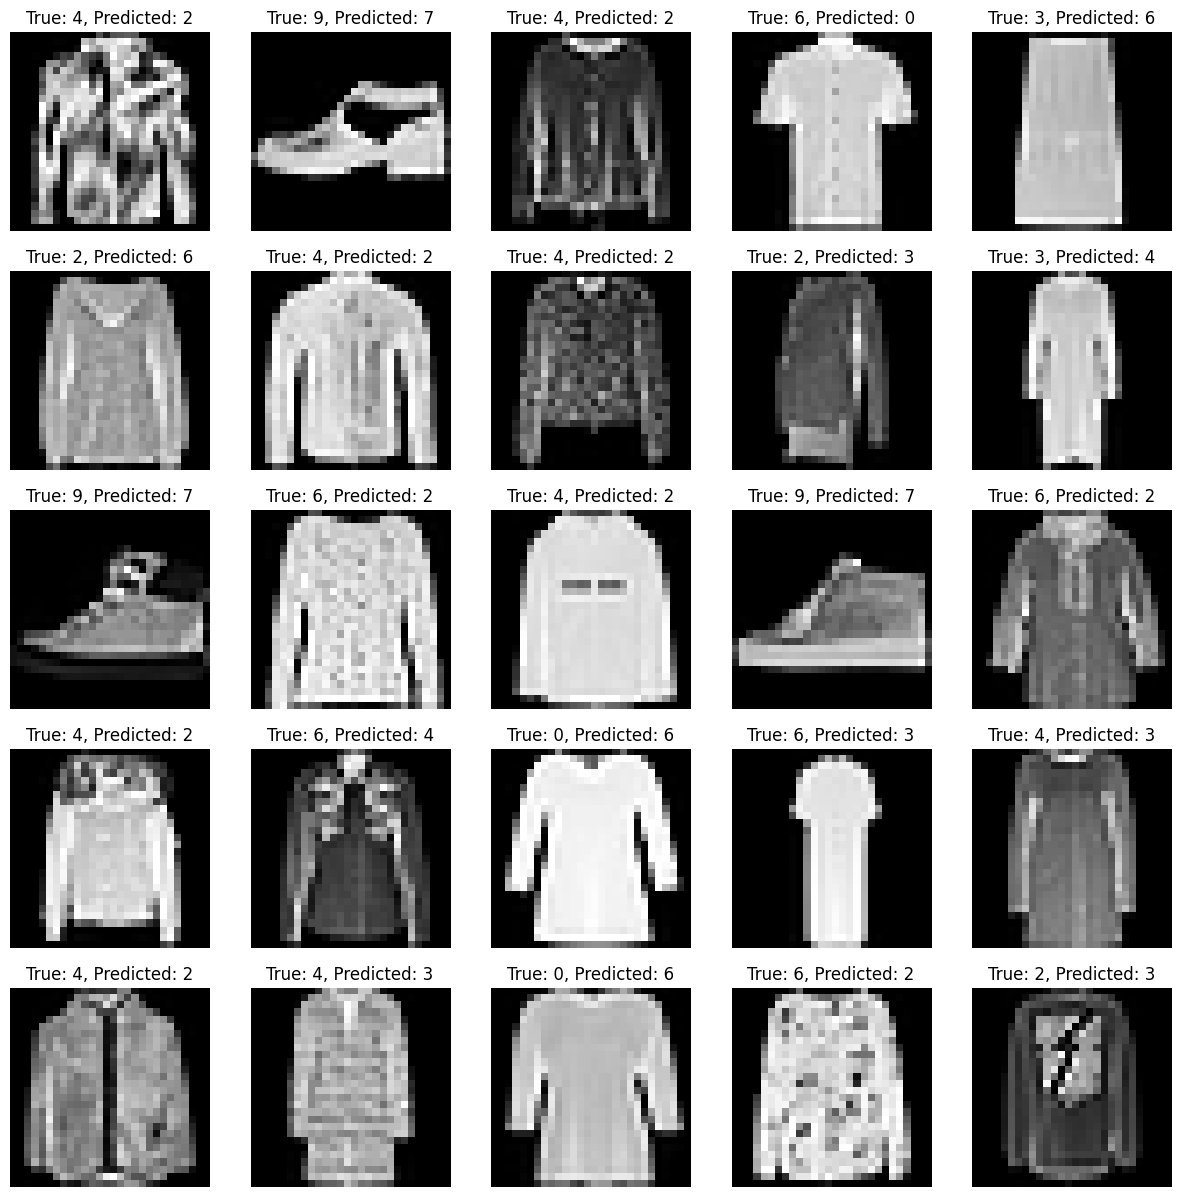

In [59]:
# Train models with different hyperparameter configurations
best_model = None
best_accuracy = 0.0

for i, config in enumerate(configurations):
    model = create_model(**config)
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2, verbose=2)
    
    # Evaluate the model
    evaluate_model(model, test_images, test_labels)
    
    # Check if this model has the highest accuracy
    if history.history['val_accuracy'][-1] > best_accuracy:
        best_accuracy = history.history['val_accuracy'][-1]
        best_model = model

# Evaluate the best model
print("\nBest Model:")
evaluate_model(best_model, test_images, test_labels)


- We observe that the model sometimes gets confused in similar looking things for example coat is predicted as pullover, ankle boot is predicted as sneaker etc

- The hyperparameters used for different models are as follows:

configurations = [
    {'hidden_layers': 2, 'units': 64, 'activation': 'relu', 'optimizer': 'adam'},
    {'hidden_layers': 3, 'units': 128, 'activation': 'sigmoid', 'optimizer': 'rmsprop'},
    {'hidden_layers': 1, 'units': 32, 'activation': 'tanh', 'optimizer': 'sgd'}
]

- We see that second model has most accuracy of 86% whereas first has 78% and third has 82% 